## Ben Johann (bmj7sf@virginia.edu)
## DS 5001
## 6 May 2022

In [ ]:
import pandas as pd
import numpy as np
from scipy.linalg import norm, eigh
from sklearn.decomposition import PCA
import plotly_express as px
from hw07 import create_bow, get_pca, get_tfidf
import nltk
from sklearn.decomposition import LatentDirichletAllocation as LDA
from hac2 import HAC

In [2]:
OHCO = ['main_genre','review_num','sent_num','token_num']
n_terms=10000

In [3]:
VOCAB = pd.read_csv('data/VOCAB.csv')
VOCAB.drop('Unnamed: 0', axis=1, inplace=True)
VOCAB.set_index('term_str', inplace=True)
TOKENS = pd.read_csv('TOKENS.csv').set_index(OHCO)

In [4]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['max_pos'] = TOKENS.value_counts(['term_str','pos']).unstack().idxmax(1)
VOCAB['n_chars'] = VOCAB.apply(lambda x: len(x.index), 1)

In [5]:
VOCAB = VOCAB.reset_index()
VOCAB = VOCAB.loc[~VOCAB.term_str.isna()]
VOCAB = VOCAB.set_index('term_str')

TOKENS = TOKENS.loc[~TOKENS.term_str.isna()]

In [6]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [7]:
VOCAB = VOCAB.loc[VOCAB.stop==0].drop('stop', axis=1)

In [8]:
def make_BAG(corpus, bag):
    BOW = corpus.groupby(bag+['term_str']).term_str.count().to_frame('n')
    return BOW

In [9]:
BOW = make_BAG(TOKENS, OHCO[:1])
TFIDF, DFIDF = get_tfidf(BOW, 'sum')

In [10]:
VOCAB['dfidf'] = DFIDF
VOCAB['tfidf'] = TFIDF.mean()

In [11]:
#TOKENS.loc['Classic Rock', 484]['term_str'].apply(lambda x:' '.join(x)).to_frame('n')
x = TOKENS.groupby(['main_genre','review_num'])['term_str'].apply(lambda x:' '.join(x)).to_frame('n')

In [12]:
#no nouns  NN NNS
pos_list = "NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS".split()
#pos_list = "JJ".split()

VIDX = VOCAB.loc[VOCAB.max_pos.isin(pos_list)]\
    .sort_values('dfidf', ascending=False)\
    .head(n_terms).index

In [13]:
LOADINGS, DCM, COMPINF = get_pca(TFIDF[VIDX], center_by_mean=False, center_by_variance=False)

In [229]:
#DCM.to_csv('pca_docs.csv')

In [14]:
LOADINGS

pc_id               0         1         2         3         4         5  \
term_str                                                                  
shaven      -0.000991 -0.000177  0.010505  0.002521 -0.003953 -0.000189   
workhowever -0.002280  0.009299 -0.002287  0.003109  0.009974 -0.007109   
savvythe    -0.001146 -0.006825  0.010275 -0.002336  0.000291 -0.001914   
returing     0.006826  0.002361  0.009683 -0.001376 -0.002296  0.008409   
tenet       -0.003837 -0.004995 -0.001845 -0.005528 -0.001536 -0.000039   
...               ...       ...       ...       ...       ...       ...   
jotted      -0.004046 -0.000242  0.006397  0.004238 -0.010789 -0.002677   
videothis   -0.004721 -0.024028  0.008342 -0.018986  0.007324 -0.008168   
toked        0.001007 -0.009743 -0.001907 -0.013396  0.004567 -0.000050   
effortsi    -0.010831  0.011286  0.018902  0.012129  0.018568  0.000455   
herealong    0.002568 -0.005122 -0.005102  0.009923 -0.001114 -0.000282   

pc_id               6         7         8         9  
term_str                                             
shaven       0.003659 -0.007895 -0.000338  0.001875  
workhowever -0.003925 -0.736679 -0.003625  0.069633  
savvythe     0.006179 -0.021952  0.111561 -0.212594  
returing     0.005699  0.039208 -0.202690  0.440131  
tenet       -0.004578 -0.057893 -0.341440 -0.355819  
...               ...       ...       ...       ...  
jotted       0.015049  0.003679  0.002073 -0.000756  
videothis    0.012838 -0.010289  0.012200 -0.023797  
toked        0.005309  0.004756  0.001177  0.001558  
effortsi     0.015028  0.009770  0.008429 -0.011201  
herealong   -0.010398 -0.001761  0.009998 -0.005147  

[10000 rows x 10 columns]

In [82]:
DCM

pc_id                 0         1         2         3         4         5  \
main_genre                                                                  
Blues          0.005481 -0.092651  0.823894  0.225285 -0.123389  0.010150   
Classic Rock  -0.139953 -0.453032 -0.300386  0.499182 -0.074893  0.347455   
Classical     -0.475926  0.300548 -0.229283 -0.147601 -0.600450 -0.117744   
Country       -0.155477 -0.627835 -0.063369 -0.521300  0.217273 -0.154278   
Jazz          -0.421121  0.432321 -0.119297  0.180560  0.588578  0.000064   
Pop            0.008130 -0.315765 -0.321058  0.358499 -0.093199 -0.107678   
R&B            0.553925  0.044655 -0.191871  0.251217  0.009042 -0.575625   
Rap & Hip-Hop  0.644607  0.219062 -0.167972 -0.228331 -0.028609  0.446677   

pc_id                 6         7         8         9  
main_genre                                             
Blues          0.110838 -0.021211  0.002182 -0.002916  
Classic Rock  -0.274243 -0.021211  0.002182 -0.002916  
Classical      0.013716 -0.021211  0.002182 -0.002916  
Country        0.025571 -0.021211  0.002182 -0.002916  
Jazz           0.090992 -0.021211  0.002182 -0.002916  
Pop            0.643528 -0.021211  0.002182 -0.002916  
R&B           -0.160018 -0.021211  0.002182 -0.002916  
Rap & Hip-Hop  0.146924 -0.021211  0.002182 -0.002916

In [15]:
#LOADINGS.to_csv('pca_loadings_table.csv')

In [16]:
#VOCAB.to_csv('VOCAB.csv')

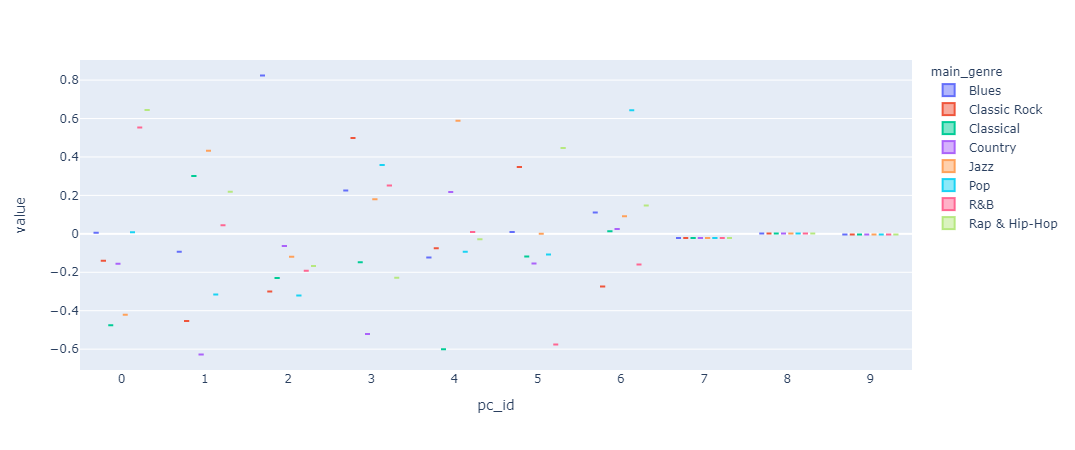

In [17]:
px.box(DCM, color=DCM.index, )

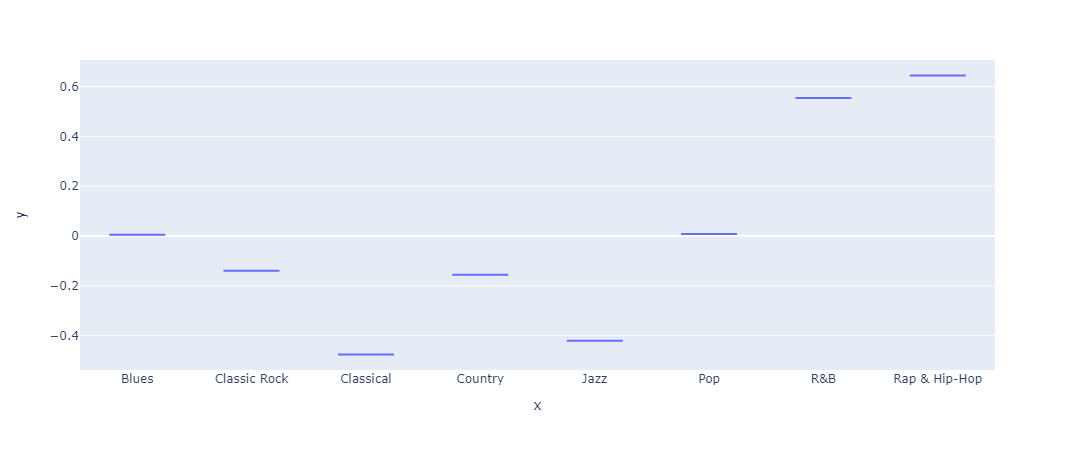

In [18]:
px.box(x=DCM.index, y= DCM.iloc[:,0])

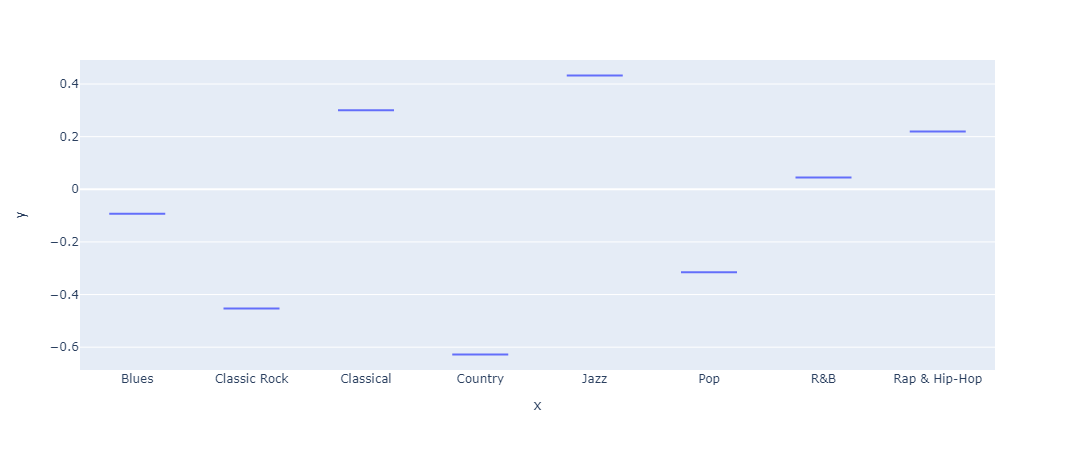

In [19]:
px.box(x=DCM.index, y= DCM.iloc[:,1])

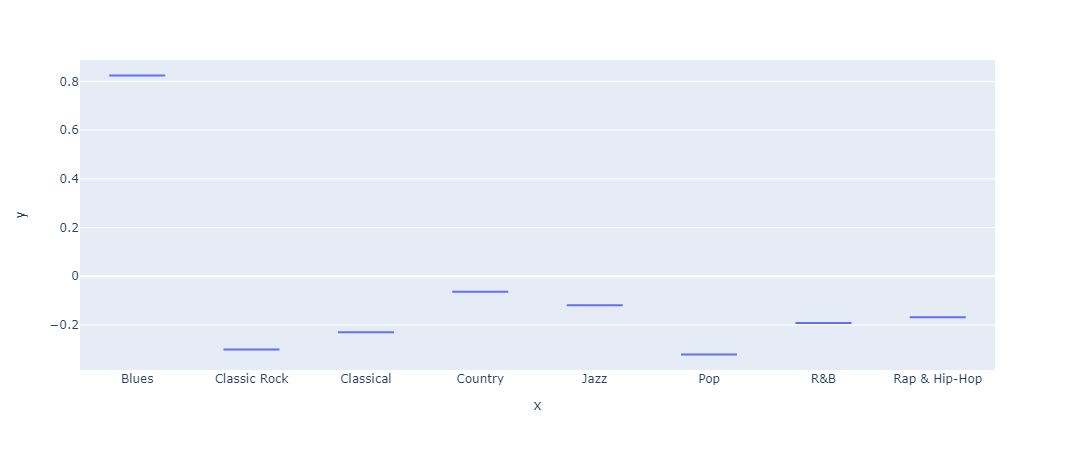

In [20]:
px.box(x=DCM.index, y= DCM.iloc[:,2])

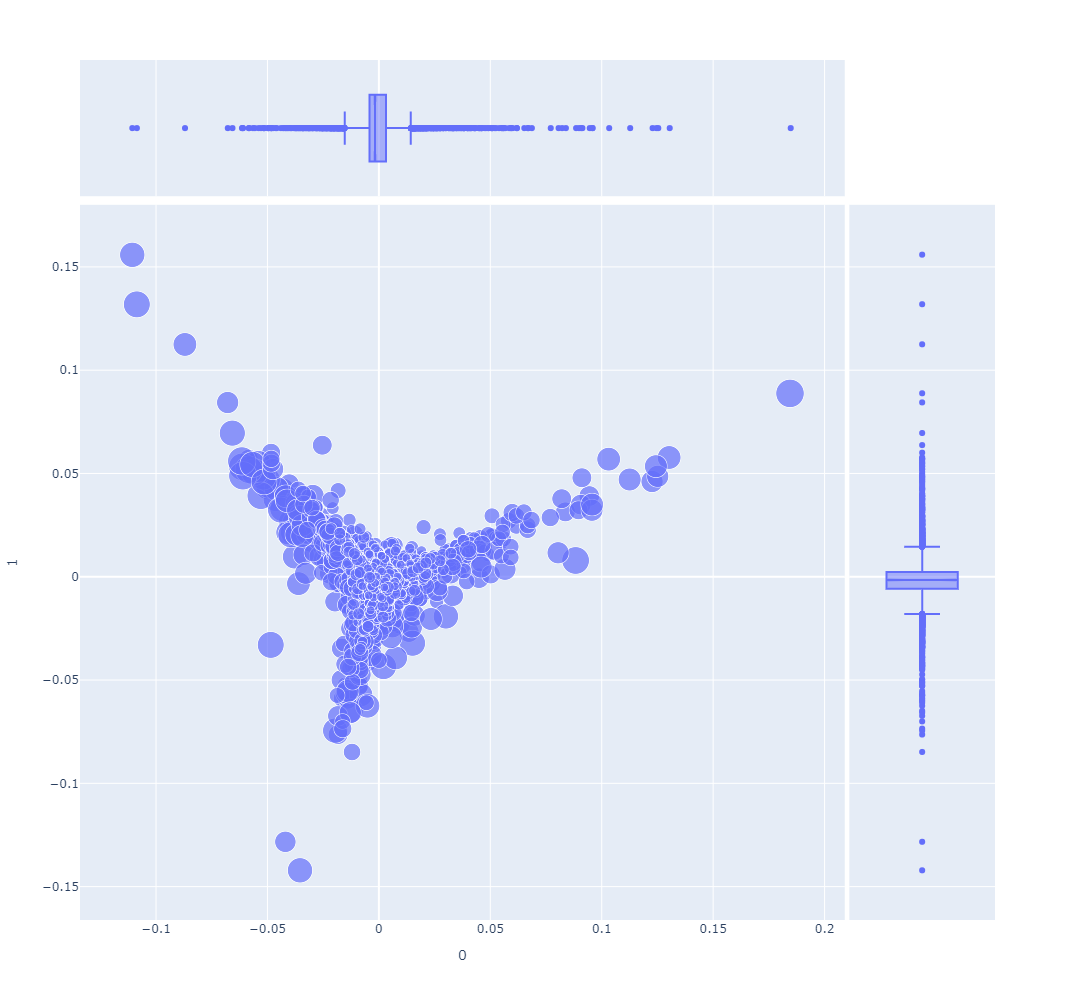

In [21]:
px.scatter(LOADINGS.reset_index(), 0, 1, hover_name='term_str', size=VOCAB.loc[VIDX].n,
           marginal_x='box', marginal_y='box', height=1000)

In [42]:
n_topics = 8
max_iter = 50

In [43]:
X = BOW.n.unstack(fill_value=0)[VIDX]
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50.)
THETA = pd.DataFrame(lda_engine.fit_transform(X.values), index=X.index)
THETA.columns.name = 'topic_id'

In [44]:
PHI = pd.DataFrame(lda_engine.components_, columns=X.columns)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [45]:
TOPIC = PHI.sum(1).to_frame('phi_sum')
TOPIC['theta_sum'] = THETA.sum()

In [46]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC['h'] = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

In [47]:
n_top_terms = round(TOPIC.h.mean())
TOPIC['top_terms'] = PHI.apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).index), 1)
TOPIC['label'] = TOPIC.apply(lambda x: f"{x.name}: {x.top_terms}", 1)

In [48]:
TOPIC = TOPIC.join(THETA.T)

In [49]:
genre_cols = ['Blues','Classic Rock','Classical','Country','Jazz','Pop','R&B','Rap & Hip-Hop']
TOPIC['max_genre'] = TOPIC[genre_cols].idxmax(1)

In [50]:
dend_phi = HAC(PHI)
labels = [f"{a} {b}" for a, b in zip(TOPIC.max_genre, TOPIC.label.tolist())]
dend_phi.labels = labels
dend_phi.w = 5

In [86]:
#PHI.to_csv('PHI.csv')

In [88]:
#THETA.to_csv('THETA.csv')

<Figure size 432x288 with 0 Axes>

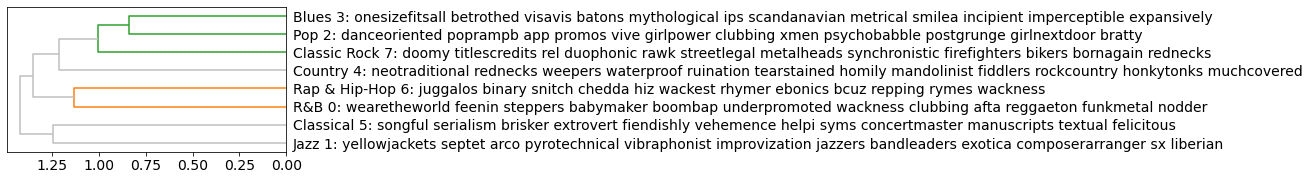

In [51]:
dend_phi.plot()

In [84]:
#TOPIC.to_csv('TOPIC.csv')

In [55]:
from gensim.models import word2vec

w2v_params = dict(
    min_count = 50,
    workers = 4,
    vector_size = 256,
    window = 2
)

SENTS = TOKENS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())

In [56]:
model = word2vec.Word2Vec(SENTS.values, **w2v_params)

W2V = pd.DataFrame(model.wv.get_normed_vectors(), index=model.wv.index_to_key)
W2V.index.name = 'term_str'
W2V = W2V.sort_index()

In [57]:
tsne_params = dict(
    learning_rate = 200., #'auto' or [10.0, 1000.0]
    perplexity = 40,
    n_components = 2,
    init = 'random',
    n_iter = 1000,
    random_state = 23    
)

In [58]:
from sklearn.manifold import TSNE

tsne_engine = TSNE(**tsne_params)
tsne_model = tsne_engine.fit_transform(W2V)

VOCAB['pos_group'] = VOCAB.max_pos.str.slice(0,2)
COORDS = pd.DataFrame(tsne_model, columns=['x','y'], index=W2V.index)\
    .join(VOCAB, how='left')[['x','y','n','dfidf','pos_group']]

In [59]:
COORDS = COORDS.loc[~COORDS.pos_group.isna()]

In [228]:
#COORDS.to_csv('EMBEDDINGS.csv')

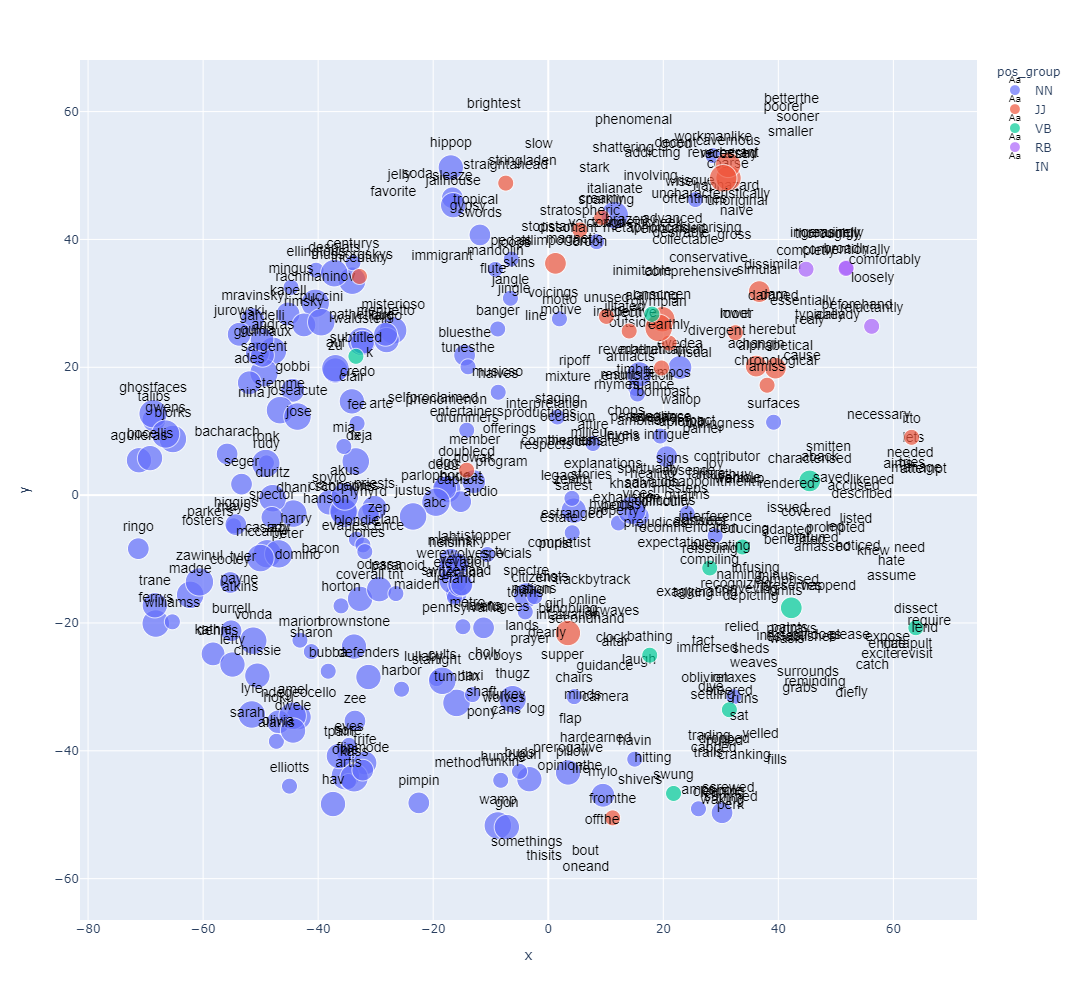

In [60]:
px.scatter(COORDS.reset_index().sample(500), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [63]:
g = COORDS[['x','y']].join(VOCAB)

In [75]:
tfidf = pd.DataFrame(TFIDF.T)
tfidf.columns = [i + '_tfidf' for i in tfidf.columns]
tfidf['max_tfidf'] = tfidf.idxmax(1)

In [77]:
g = g.join(tfidf)

In [78]:
n_terms = 4000

pos_list = "NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS".split()
#pos_list = "JJ".split()

VIDX = g.loc[VOCAB.max_pos.isin(pos_list)]\
    .sort_values('tfidf', ascending=False)\
    .head(n_terms).index

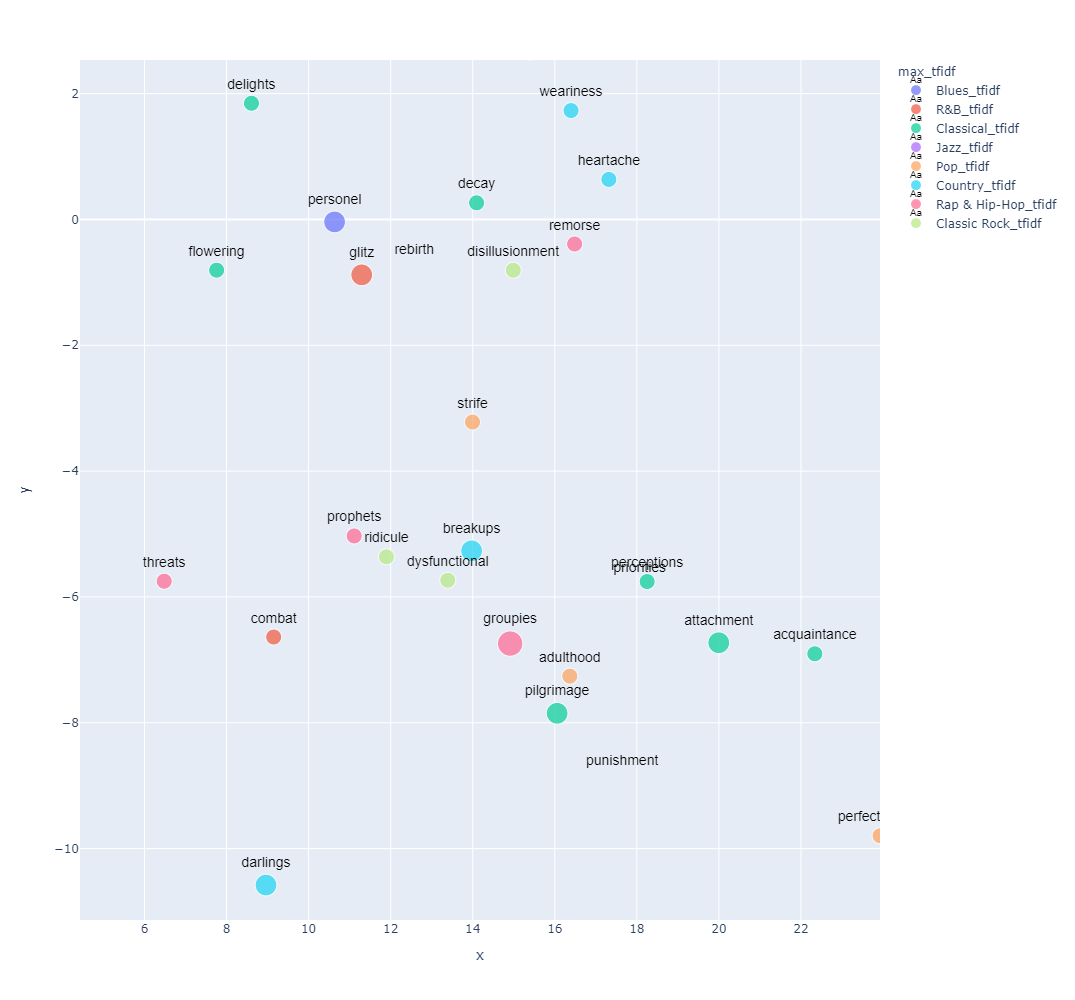

In [81]:
px.scatter(g.loc[VIDX].reset_index().sample(500), 
           'x', 'y', 
           text='term_str', 
           color='max_tfidf', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000, width=1100).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [117]:
SALEX = pd.read_csv('salex_combo.csv').set_index('term_str')
LIB = pd.read_csv('LIB.csv', usecols=['main_genre','review_num','unixReviewTime','overall']).set_index(['main_genre', 'review_num'])

In [111]:
BOW = make_BAG(TOKENS, OHCO[:2])

In [122]:
COMBO = TOKENS.join(LIB).join(SALEX, on='term_str').join(BOW, on=OHCO[:2] + ['term_str'])
COMBO = COMBO.reset_index().set_index(OHCO).sort_index()

In [123]:
COMBO

pos     token_str    term_str  \
main_genre    review_num sent_num token_num                                  
Blues         3820       0        0           EX         There       there   
                                  1          VBZ            is          is   
                                  2           NN       nothing     nothing   
                                  3           IN          like        like   
                                  4          VBG        seeing      seeing   
...                                          ...           ...         ...   
Rap & Hip-Hop 1096829    5        85          NN  beat.Creepy,  beatcreepy   
                                  86          RB           yet         yet   
                                  87          JJ       melodic     melodic   
                                  88          CC           and         and   
                                  89          NN   meditative.  meditative   

                                             overall  unixReviewTime  \
main_genre    review_num sent_num token_num                            
Blues         3820       0        0              5.0       967766400   
                                  1              5.0       967766400   
                                  2              5.0       967766400   
                                  3              5.0       967766400   
                                  4              5.0       967766400   
...                                              ...             ...   
Rap & Hip-Hop 1096829    5        85             4.0      1400457600   
                                  86             4.0      1400457600   
                                  87             4.0      1400457600   
                                  88             4.0      1400457600   
                                  89             4.0      1400457600   

                                             nrc_anger  nrc_anticipation  \
main_genre    review_num sent_num token_num                                
Blues         3820       0        0                NaN               NaN   
                                  1                NaN               NaN   
                                  2                NaN               NaN   
                                  3                NaN               NaN   
                                  4                NaN               NaN   
...                                                ...               ...   
Rap & Hip-Hop 1096829    5        85               NaN               NaN   
                                  86               NaN               NaN   
                                  87               NaN               NaN   
                                  88               NaN               NaN   
                                  89               NaN               NaN   

                                             nrc_disgust  nrc_fear  nrc_joy  \
main_genre    review_num sent_num token_num                                   
Blues         3820       0        0                  NaN       NaN      NaN   
                                  1                  NaN       NaN      NaN   
                                  2                  NaN       NaN      NaN   
                                  3                  NaN       NaN      NaN   
                                  4                  NaN       NaN      NaN   
...                                                  ...       ...      ...   
Rap & Hip-Hop 1096829    5        85                 NaN       NaN      NaN   
                                  86                 NaN       NaN      NaN   
                                  87                 NaN       NaN      NaN   
                                  88                 NaN       NaN      NaN   
                                  89                 NaN       NaN      NaN   

                                             ...  nrc_sadness  nrc_surprise 

In [127]:
COMBO = COMBO.dropna()

In [128]:
COMBO.columns

Index(['pos', 'token_str', 'term_str', 'overall', 'unixReviewTime',
       'nrc_anger', 'nrc_anticipation', 'nrc_disgust', 'nrc_fear', 'nrc_joy',
       'nrc_negative', 'nrc_positive', 'nrc_sadness', 'nrc_surprise',
       'nrc_trust', 'nrc_polarity', 'bing_negative', 'bing_positive',
       'bing_sentiment', 'syu_sentiment', 'gi_sentiment'],
      dtype='object')

In [147]:
emotions = ['nrc_anger', 'nrc_anticipation', 'nrc_disgust', 'nrc_joy',
       'nrc_sadness', 'nrc_surprise',
       'nrc_trust','nrc_polarity']

In [126]:
COMBO.drop('n',axis=1,  inplace=True)

In [232]:
#COMBO.to_csv('token_sentiment.csv')

In [151]:
GENRES = COMBO.groupby(OHCO[:1])[emotions].mean()

In [231]:
#GENRES.to_csv('doc_sentiment.csv')

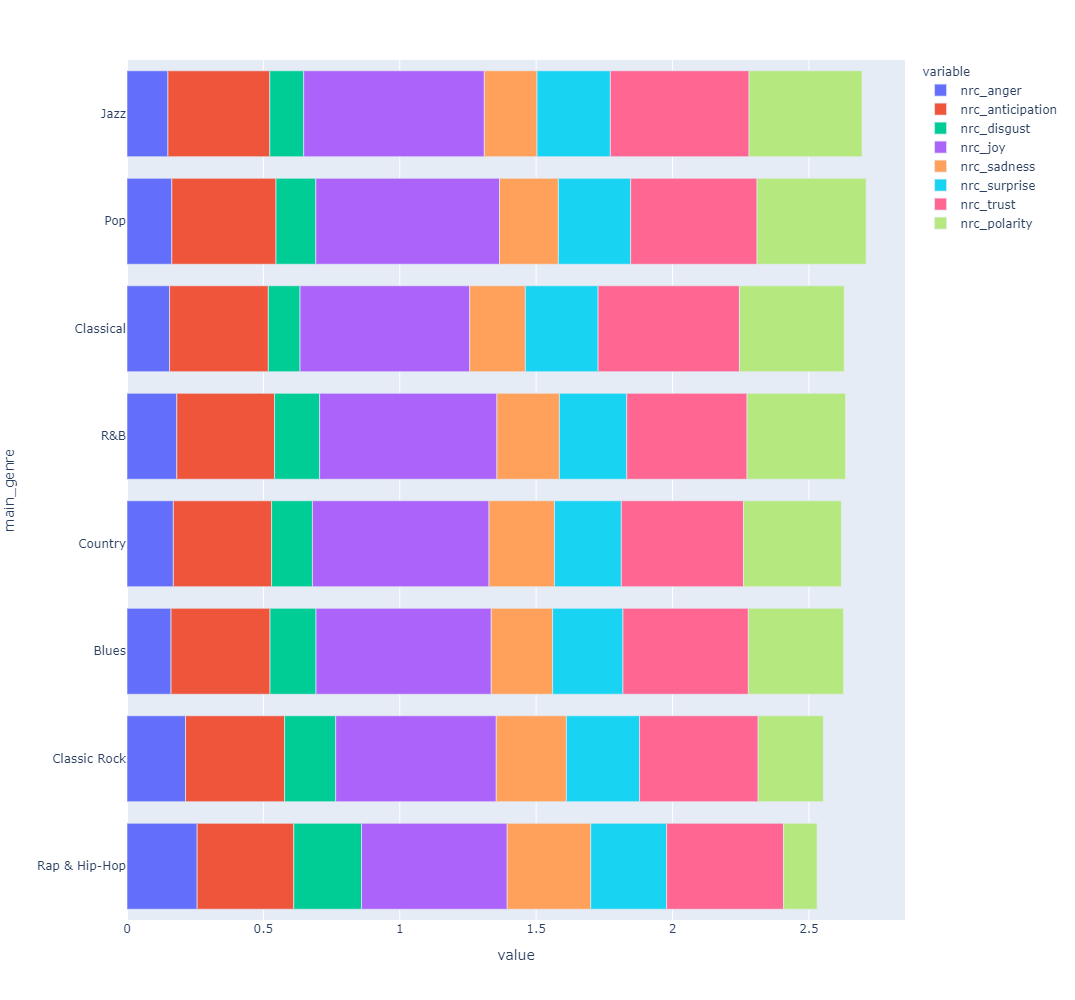

In [152]:
px.bar(GENRES.sort_values('nrc_polarity'), emotions, orientation='h', height=1000)

In [197]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.groupby('unixReviewTime').mean()

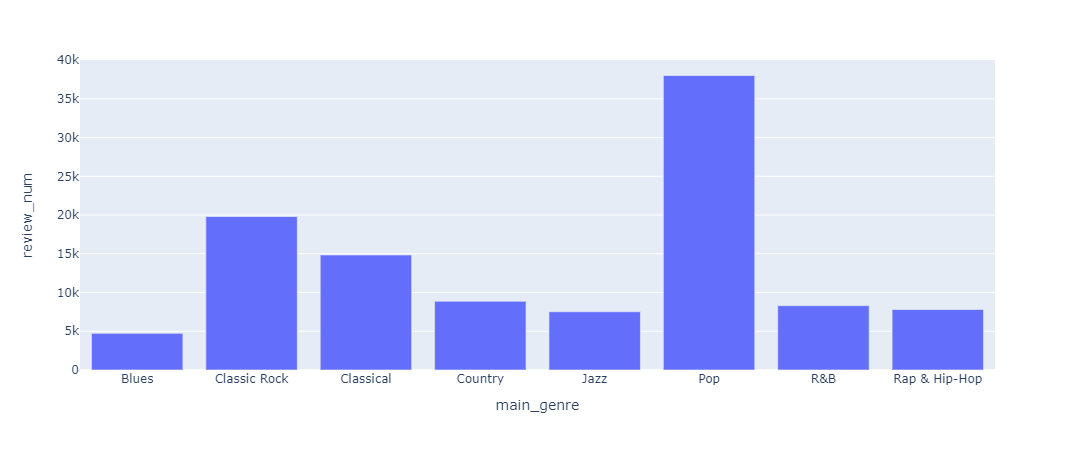

In [226]:
fig = px.bar(REVIEWS.reset_index().groupby('main_genre')['review_num'].count().reset_index(), x='main_genre', y='review_num')
fig.show()

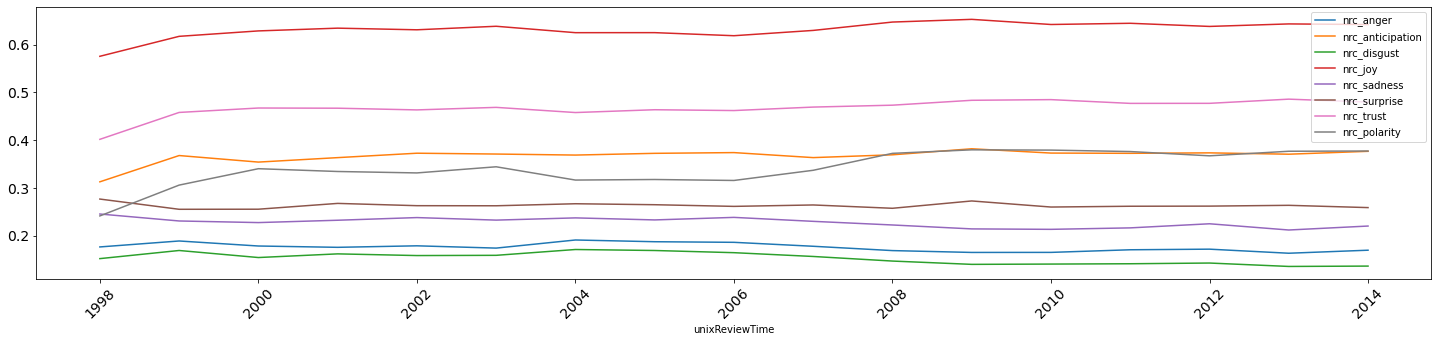

In [201]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)

#REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()

REVIEWS_y.plot(**FIG);

In [205]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS.loc['Rap & Hip-Hop']

nrc_anger  nrc_anticipation  nrc_disgust   nrc_joy  nrc_sadness  \
review_num                                                                    
8628         0.500000          0.000000     0.500000  0.000000     0.500000   
8631         0.333333          0.111111     0.222222  0.444444     0.222222   
8635         0.416667          0.166667     0.583333  0.250000     0.166667   
8640         0.333333          0.000000     0.333333  0.666667     0.000000   
10105        0.400000          0.400000     0.200000  0.600000     0.200000   
...               ...               ...          ...       ...          ...   
1096746      0.000000          1.000000     0.000000  1.000000     0.000000   
1096816      0.333333          0.400000     0.200000  0.466667     0.466667   
1096822      0.400000          0.100000     0.300000  0.400000     0.100000   
1096824      0.333333          0.250000     0.500000  0.333333     0.333333   
1096829      0.333333          1.000000     0.333333  0.666667     0.333333   

            nrc_surprise  nrc_trust  nrc_polarity  
review_num                                         
8628            0.000000   0.000000     -1.000000  
8631            0.222222   0.444444      0.111111  
8635            0.250000   0.083333     -0.500000  
8640            1.000000   0.000000      0.333333  
10105           0.600000   0.400000      0.200000  
...                  ...        ...           ...  
1096746         1.000000   1.000000      1.000000  
1096816         0.266667   0.400000     -0.066667  
1096822         0.000000   0.400000      0.200000  
1096824         0.333333   0.333333     -0.333333  
1096829         0.333333   0.666667      0.333333  

[5430 rows x 8 columns]

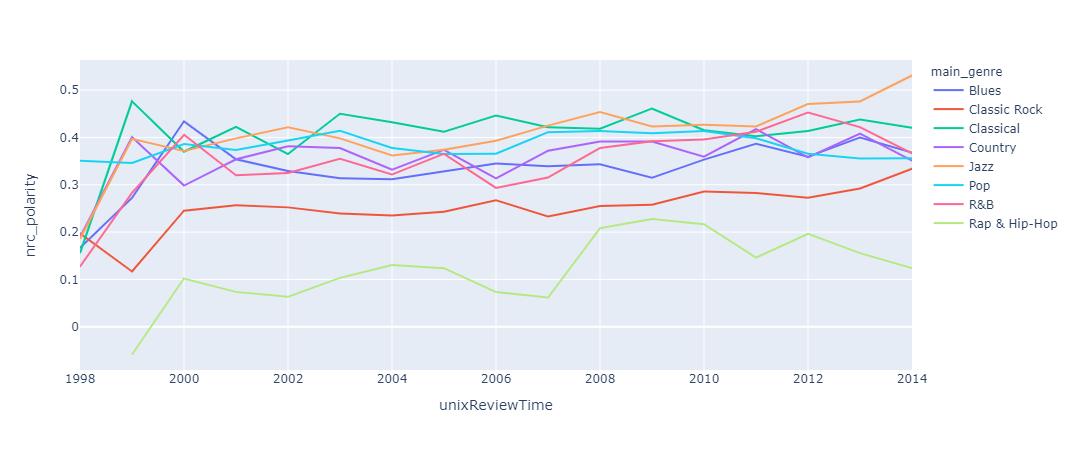

In [224]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.reset_index().groupby(['main_genre','unixReviewTime'])['nrc_polarity'].mean().reset_index()

fig = px.line(REVIEWS_y, x="unixReviewTime", y="nrc_polarity", color='main_genre')
fig.show()

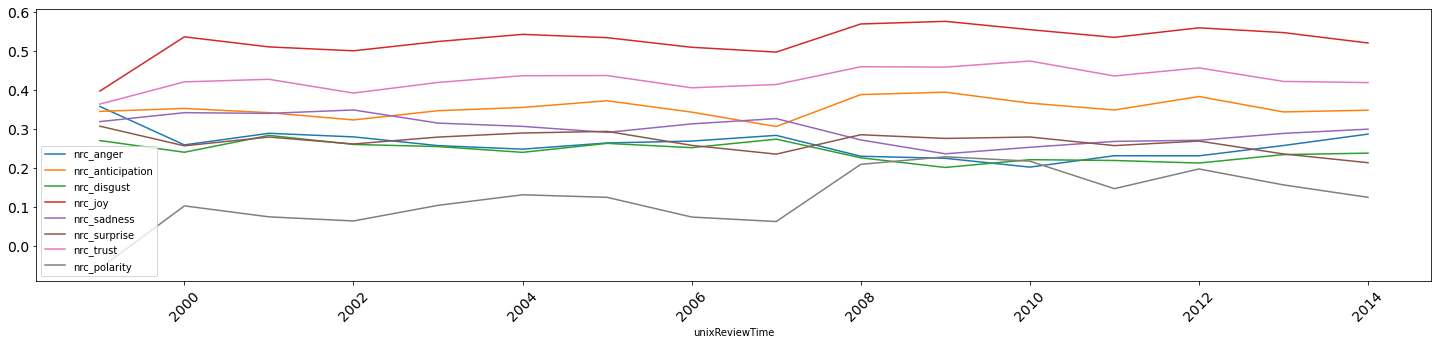

In [209]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Rap & Hip-Hop'].groupby('unixReviewTime').mean()

REVIEWS_y.plot(**FIG);

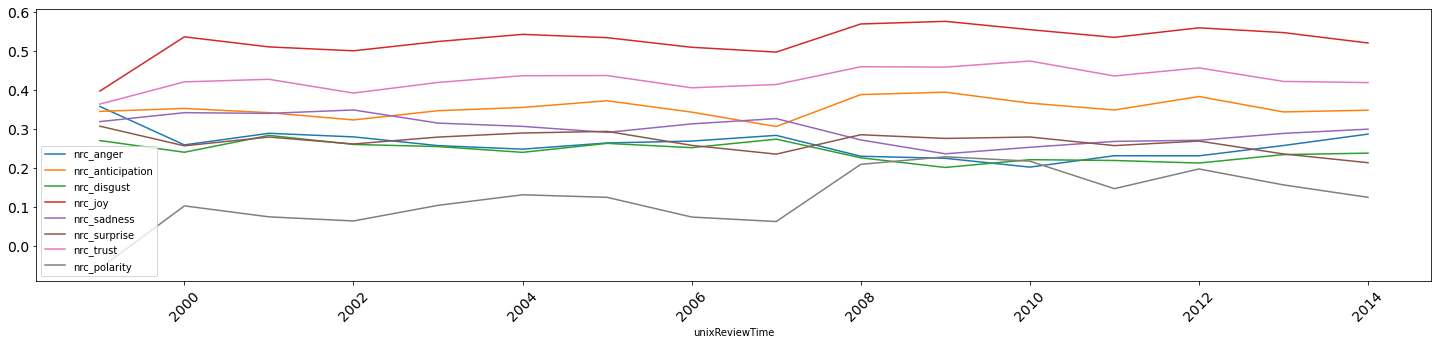

In [211]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Rap & Hip-Hop'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

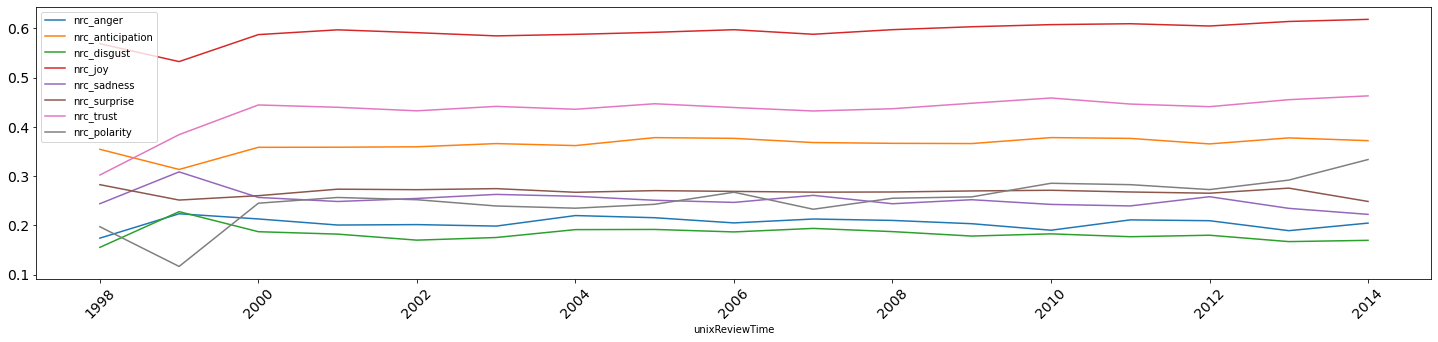

In [213]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Classic Rock'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

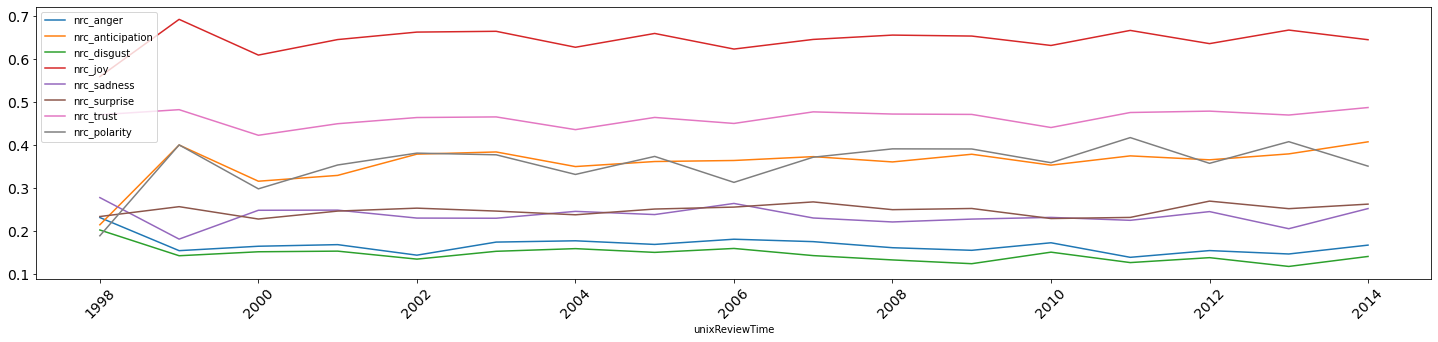

In [214]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Country'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

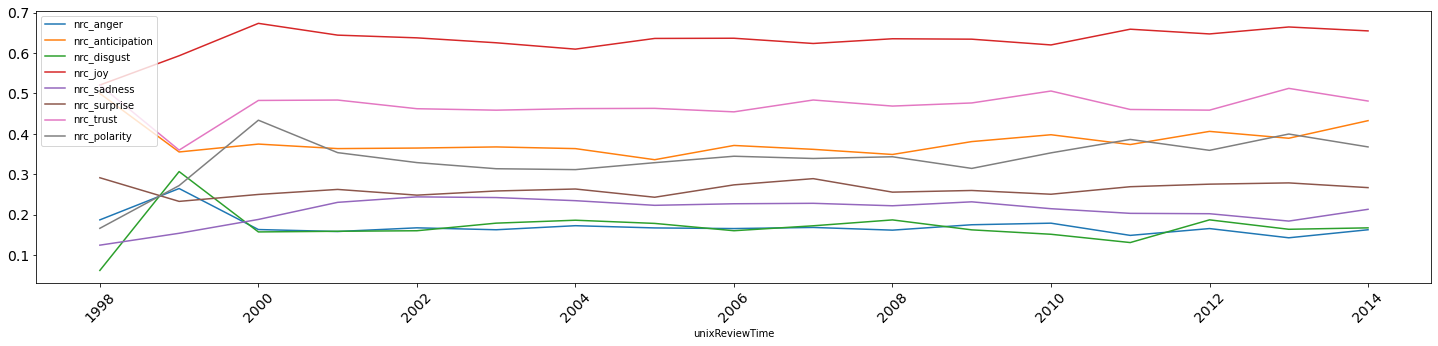

In [215]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Blues'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

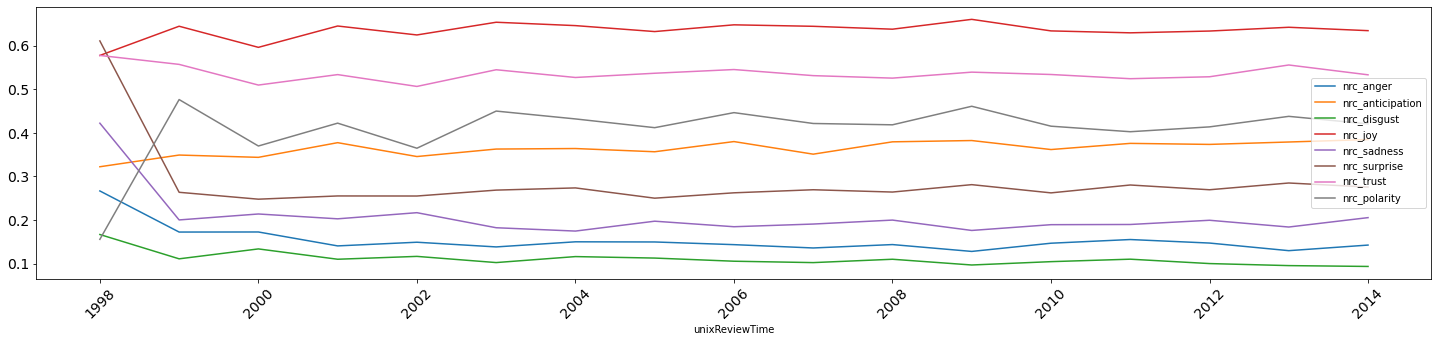

In [217]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Classical'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

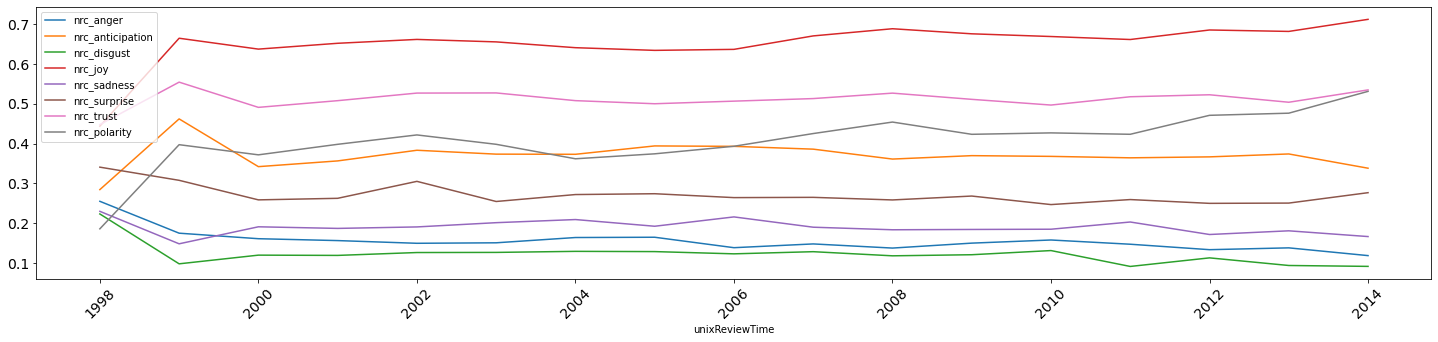

In [218]:
REVIEWS = COMBO.groupby(OHCO[:2])[emotions].mean()
REVIEWS = REVIEWS.join(LIB['unixReviewTime'], on=OHCO[:2])

REVIEWS.unixReviewTime = pd.DatetimeIndex(pd.to_datetime(REVIEWS.unixReviewTime, 
                                        unit='s')).year
REVIEWS_y = REVIEWS.loc['Jazz'].groupby('unixReviewTime').mean()
REVIEWS_y.plot(**FIG);

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

SENTENCES['sent_str'] = COMBO.groupby(OHCO[:-1]).term_str.apply(lambda x: x.str.cat(sep=' '))
vader_cols = [f"vader_{col}" for col in "neg neu pos compound".split()]
SENTENCES[vader_cols] = SENTENCES.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))